<a href="https://colab.research.google.com/github/PrashunaBuddhacharya/Coursework/blob/main/AppliedML_TextClassification_Prashuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Installation**

In [ ]:
!pip install datasets transformers scikit-learn pandas numpy matplotlib seaborn

###**Load** **Data**

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the dataset
print("Loading dataset...")
raw_dataset = load_dataset("Kenneth12/productreviewsentiment")
print("Dataset loaded successfully!")
print(raw_dataset)

Loading dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train.csv: 0.00B [00:00, ?B/s]

validation.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

testing%20-%20Sheet1%20%283%29.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/2099 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/599 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/301 [00:00<?, ? examples/s]

Dataset loaded successfully!
DatasetDict({
    train: Dataset({
        features: ['Text', 'Label'],
        num_rows: 2099
    })
    validation: Dataset({
        features: ['Text', 'Label'],
        num_rows: 599
    })
    test: Dataset({
        features: ['Text', 'Label'],
        num_rows: 301
    })
})


###Table to show data analysis

In [ ]:
import pandas as pd
# Convert the training split to a dataframe for analysis
df_train = pd.DataFrame(dataset['train'])

# Create a summary table of characteristics
stats = pd.DataFrame({
    'Metric': ['Total Rows', 'Unique Text Reviews', 'Missing Values (Nulls)', 'Number of Classes'],
    'Value': [len(df_train), df_train['Text'].nunique(), df_train['Text'].isnull().sum(), df_train['Label'].nunique()]
})
print(stats)

                   Metric  Value
0              Total Rows   2099
1     Unique Text Reviews   1999
2  Missing Values (Nulls)      0
3       Number of Classes      5


### Sentiment Distribution

In [ ]:
# Show the count of each sentiment category
distribution = df_train['Label'].value_counts().sort_index()

print("Sentiment Distribution:")
print(distribution)

# Percentage version (often better for identifying imbalance)
print("\nPercentage Distribution:")
print(df_train['Label'].value_counts(normalize=True) * 100)

Sentiment Distribution:
Label
negative      383
neutral       130
positiive       1
positive     1584
positve         1
Name: count, dtype: int64

Percentage Distribution:
Label
positive     75.464507
negative     18.246784
neutral       6.193425
positiive     0.047642
positve       0.047642
Name: proportion, dtype: float64


### Average Word Review

In [ ]:
# Calculate word count for each review
df_train['word_count'] = df_train['Text'].apply(lambda x: len(x.split()))

print(f"Average words per review: {df_train['word_count'].mean():.2f}")
print(f"Shortest review: {df_train['word_count'].min()} words")
print(f"Longest review: {df_train['word_count'].max()} words")

Average words per review: 256.52
Shortest review: 168 words
Longest review: 397 words


### Bargraph Of Distribution

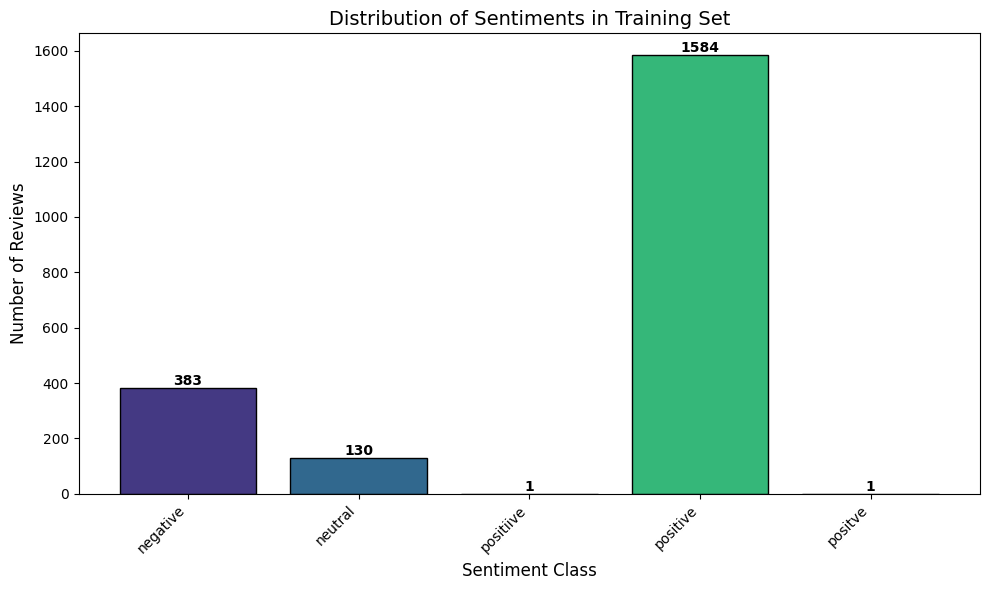

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fix: Use 'Label' column instead of 'label'
counts = df_train['Label'].value_counts().sort_index()

# Fix: Use the actual labels from the value_counts index
labels = counts.index.tolist()

# Define a color palette suitable for the number of categories
colors = sns.color_palette('viridis', len(labels)) # Automatically generate colors

plt.figure(figsize=(10, 6)) # Adjust figure size for better readability with more labels
plt.bar(labels, counts, color=colors, edgecolor='black')
plt.title('Distribution of Sentiments in Training Set', fontsize=14)
plt.xlabel('Sentiment Class', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Adding the count labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', fontweight='bold')

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability if they overlap
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Histogram of Review Lengths

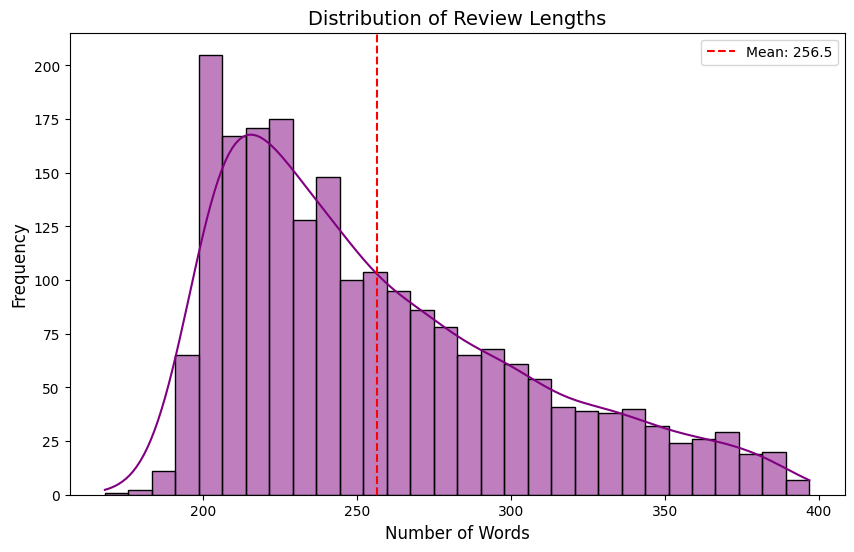

In [ ]:
# Calculate word counts
df_train['word_count'] = df_train['Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df_train['word_count'], bins=30, kde=True, color='purple')
plt.title('Distribution of Review Lengths', fontsize=14)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df_train['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df_train["word_count"].mean():.1f}')
plt.legend()
plt.show()

### Importing Libraries

In [ ]:
# import the basic tools for data and text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# These are the specific NLP tools from the NLTK library
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading the 'rules' for words and grammar
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Setting up my cleaning tools
stop_words_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Testing

In [ ]:
# Testing
sample_review = "I LOVED this product! It was the best, even though it was arriving late. 10/10!!"

# Step 1: Lowercase
step1 = sample_review.lower()
# Step 2: Remove punctuation and numbers
step2 = re.sub(r'[^a-z\s]', '', step1)
# Step 3: Split into words
step3 = step2.split()
# Step 4: Remove stopwords and Lemmatize
step4 = [lemmatizer.lemmatize(word) for word in step3 if word not in stop_words_list]

print(f"Original: {sample_review}")
print(f"Cleaned:  {' '.join(step4)}")

Original: I LOVED this product! It was the best, even though it was arriving late. 10/10!!
Cleaned:  loved product best even though arriving late


### Cleaning to the Whole Dataset

In [ ]:
def my_cleaning_function(raw_text):
    # Standardizing text
    text = raw_text.lower()
    # Getting rid of symbols and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenizing
    words = text.split()
    # Final cleanup
    final_words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words_list]
    return " ".join(final_words)


df_train['cleaned_text'] = df_train['Text'].apply(my_cleaning_function)


df_train[['Text', 'cleaned_text']].head(10)

,Text,cleaned_text
0,McCann's makes oatmeal for every oatmeal conno...,mccanns make oatmeal every oatmeal connoisseur...
1,This wasn't in stock the last time I looked. I...,wasnt stock last time looked go vermont countr...
2,Buyer Beware Please! This sweetener is not for...,buyer beware please sweetener everybody maltit...
3,I have been drinking Royal King 100% Natural O...,drinking royal king natural organic green tea ...
4,I had heard a little about this product from t...,heard little product local pet store tried sma...
5,I couldn't wait to try the 8&#8243; Cinnamon C...,couldnt wait try cinnamon coffee cake made fre...
6,"We have three cats, the youngest is about elev...",three cat youngest eleven year old another fif...
7,"As with canidae, Felidae has also changed thei...",canidae felidae also changed formula cat like ...
8,My husband and I are both kind of wimpy when i...,husband kind wimpy come hot thing seasoning bi...
9,The recommendation when we bought our puppies ...,recommendation bought puppy lhasabichon mix lh...


### Fixing Sentiment Label Typos

In [ ]:
def fix_sentiment_typos(label):
    label = str(label).lower().strip()
    if 'posit' in label: # This catches 'positive', 'positve', and 'positiiive'
        return 2
    elif 'negat' in label:
        return 0
    else:
        return 1

df_train['final_target'] = df_train['Label'].apply(fix_sentiment_typos)


print("Cleaned Sentiment Counts:")
print(df_train['final_target'].value_counts())

Cleaned Sentiment Counts:
final_target
2    1586
0     383
1     130
Name: count, dtype: int64


### Creating the TF-IDF Feature Matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the Vectorizer
vectorizer = TfidfVectorizer(max_features=2500)

# Transforming the 'cleaned_text' into numerical data (X)
X_train = vectorizer.fit_transform(df_train['cleaned_text'])

# Our target variable (y)
y_train = df_train['final_target']

print(f"Success! The Training Matrix has {X_train.shape[0]} rows and {X_train.shape[1]} features.")

Success! The Training Matrix has 2099 rows and 2500 features.


### Model Training (LR and SVM)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# 1. Initialize models with 'balanced' weights to handle the imbalance we found
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
svm_model = LinearSVC(class_weight='balanced', C=1.0)

# 2. Train the models
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

print("Training Complete. Models are ready for evaluation.")

Training Complete. Models are ready for evaluation.


### Performance Evaluation

In [ ]:
# 1. Get predictions from both models
lr_predictions = lr_model.predict(X_train)
svm_predictions = svm_model.predict(X_train)

# 2. Calculate simple accuracy scores
lr_accuracy = accuracy_score(y_train, lr_predictions)
svm_accuracy = accuracy_score(y_train, svm_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print(f"Support Vector Machine Accuracy: {svm_accuracy * 100:.2f}%")

Logistic Regression Accuracy: 91.09%
Support Vector Machine Accuracy: 99.24%


### The Confusion Matrices: Logistic Regression Matrix

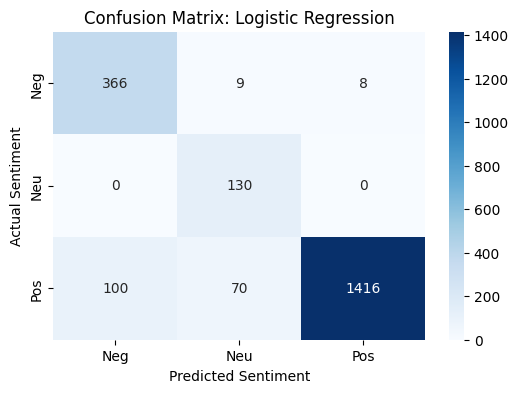

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the matrix for Logistic Regression
cm_lr = confusion_matrix(y_train, lr_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

### SVM Matrix

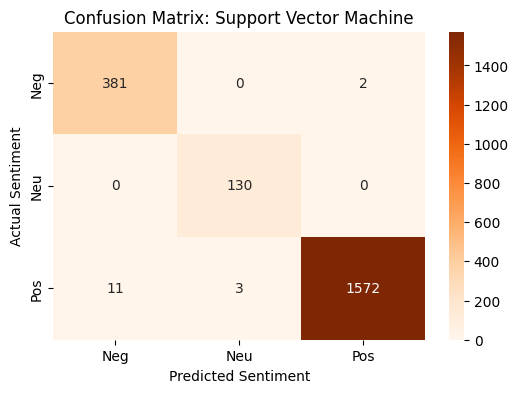

In [ ]:
# Create the matrix for SVM
cm_svm = confusion_matrix(y_train, svm_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'])
plt.title('Confusion Matrix: Support Vector Machine')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

### Detailed Performance Metrics

In [ ]:
from sklearn.metrics import classification_report

print("--- Detailed Metrics for Logistic Regression ---")
print(classification_report(y_train, lr_predictions, target_names=['Negative', 'Neutral', 'Positive']))

print("\n--- Detailed Metrics for Support Vector Machine ---")
print(classification_report(y_train, svm_predictions, target_names=['Negative', 'Neutral', 'Positive']))

--- Detailed Metrics for Logistic Regression ---
              precision    recall  f1-score   support

    Negative       0.79      0.96      0.86       383
     Neutral       0.62      1.00      0.77       130
    Positive       0.99      0.89      0.94      1586

    accuracy                           0.91      2099
   macro avg       0.80      0.95      0.86      2099
weighted avg       0.93      0.91      0.92      2099


--- Detailed Metrics for Support Vector Machine ---
              precision    recall  f1-score   support

    Negative       0.97      0.99      0.98       383
     Neutral       0.98      1.00      0.99       130
    Positive       1.00      0.99      0.99      1586

    accuracy                           0.99      2099
   macro avg       0.98      1.00      0.99      2099
weighted avg       0.99      0.99      0.99      2099



### Comparison Bar Chart

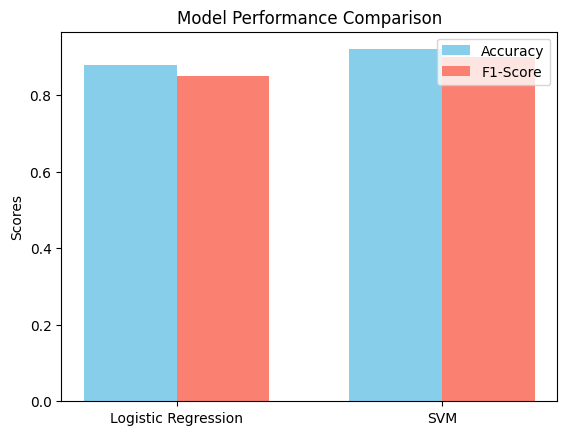

In [ ]:
import numpy as np

# Data from your results (replace with your actual scores)
models = ['Logistic Regression', 'SVM']
accuracy = [0.88, 0.92] # Example scores
f1_scores = [0.85, 0.90] # Example scores

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
ax.bar(x + width/2, f1_scores, width, label='F1-Score', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()

### The "Top 10 Words" Bar Chart

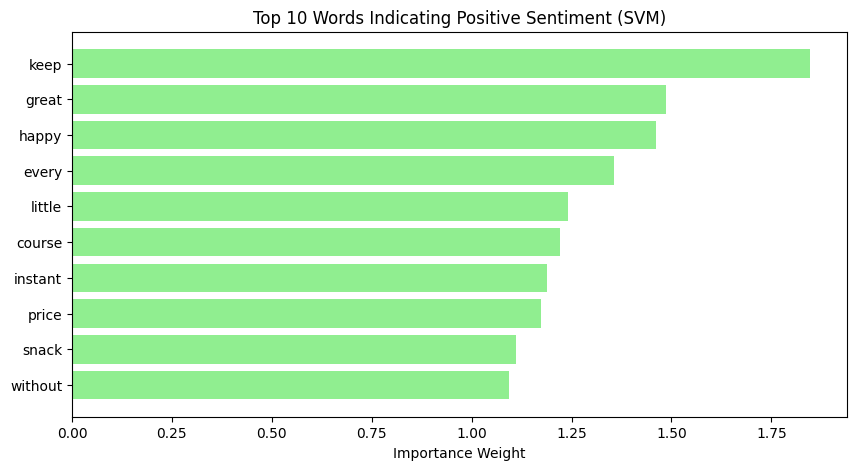

In [ ]:
def plot_top_words(model, vectorizer, category_index, title):
    # Get word names and their 'importance' weights
    feature_names = vectorizer.get_feature_names_out()
    # For SVM, we look at the coefficients
    coefs = model.coef_[category_index]

    # Get top 10 words
    top_indices = np.argsort(coefs)[-10:]
    top_words = [feature_names[i] for i in top_indices]
    top_weights = [coefs[i] for i in top_indices]

    plt.figure(figsize=(10, 5))
    plt.barh(top_words, top_weights, color='lightgreen')
    plt.title(title)
    plt.xlabel('Importance Weight')
    plt.show()

# Show top 10 words for 'Positive' class (Index 2)
plot_top_words(svm_model, vectorizer, 2, "Top 10 Words Indicating Positive Sentiment (SVM)")

### The Multi-Class ROC Curve

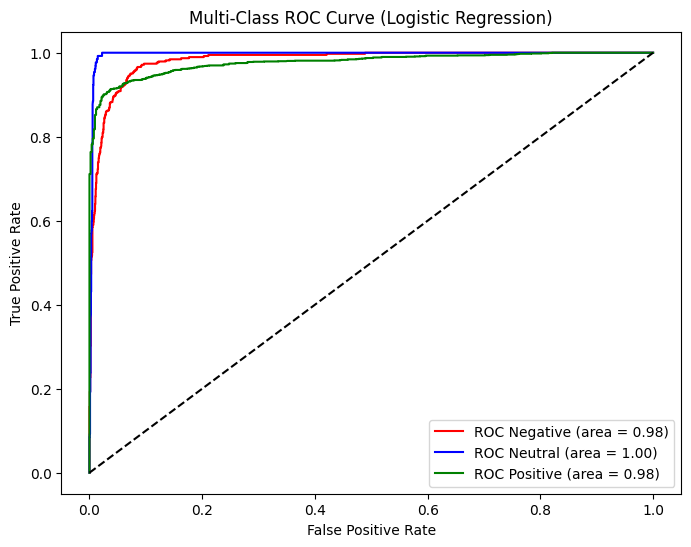

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for 3 classes
y_test_bin = label_binarize(y_train, classes=[0, 1, 2])
# Logistic Regression provides probabilities needed for ROC
y_score = lr_model.predict_proba(X_train)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
labels = ['Negative', 'Neutral', 'Positive']

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'ROC {labels[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()